# Titanic - Machine Learning from Disaster

- Vamos utilizar os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)
    - É um dataset de **competição**
    - O resultado é avaliado através da **acurácia**:
        - _"Sua pontuação é a porcentagem de passageiros que você prevê corretamente. Isso é conhecido como acurácia."_

---

Esse notebook é um gabarito encontrado no kaggle que obtem 100% de acertos no desafio, o objetivo aqui é entender e replicar o código encontrado em: https://www.kaggle.com/code/amerwafiy/titanic-competition-journey-to-100-accuracy/notebook#Read-files-and-have-a-glimpse-of-the-data

### Lendo os arquivos e tendo uma ideia da base de dados

In [45]:
# data analysis and wrangling
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [42]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

### EDA

In [43]:
# Chegando numeros de valores unicos para todas as colunas
for col in train.columns:
    print(col + ': ' + str(train[col].nunique()) + ' valores unicos')
print('_'*80)
print(train.info())
print('_'*80)
# Estatisticas de dados numéricos
print(train.describe())
print('_'*80)
# Estatisticas de dados categóricos
print(train.describe(include=['O']))
print('_'*80)
# Checando por valores vazios em todas as colunas
print('Total de dados vazios em todas colunas da base de dados treino (Train):')
print(train.isnull().sum())
print('Total de dados vazios em todas colunas da base de dados teste (Test):')
print(test.isnull().sum())

PassengerId: 891 valores unicos
Survived: 2 valores unicos
Pclass: 3 valores unicos
Name: 891 valores unicos
Sex: 2 valores unicos
Age: 88 valores unicos
SibSp: 7 valores unicos
Parch: 7 valores unicos
Ticket: 681 valores unicos
Fare: 248 valores unicos
Cabin: 147 valores unicos
Embarked: 3 valores unicos
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10

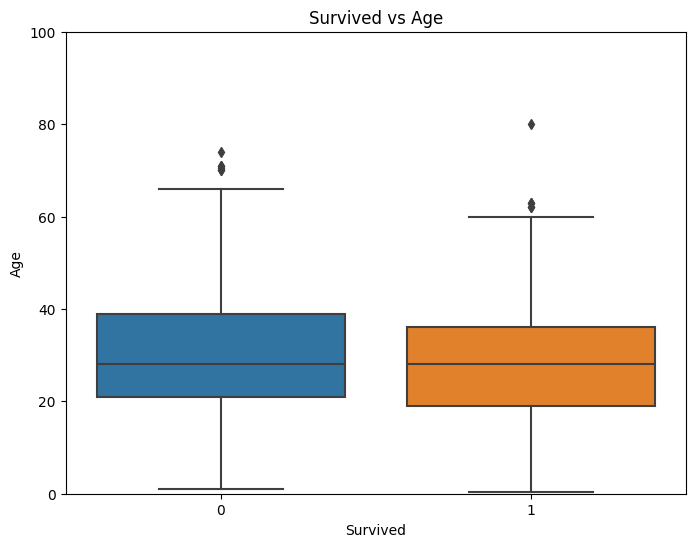

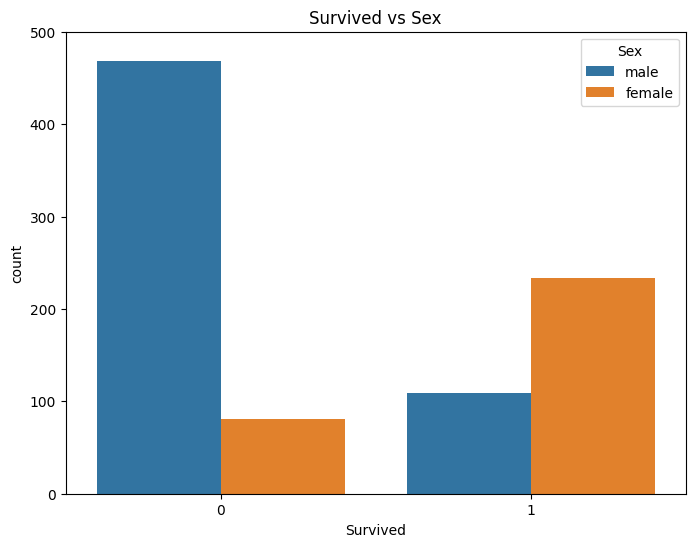

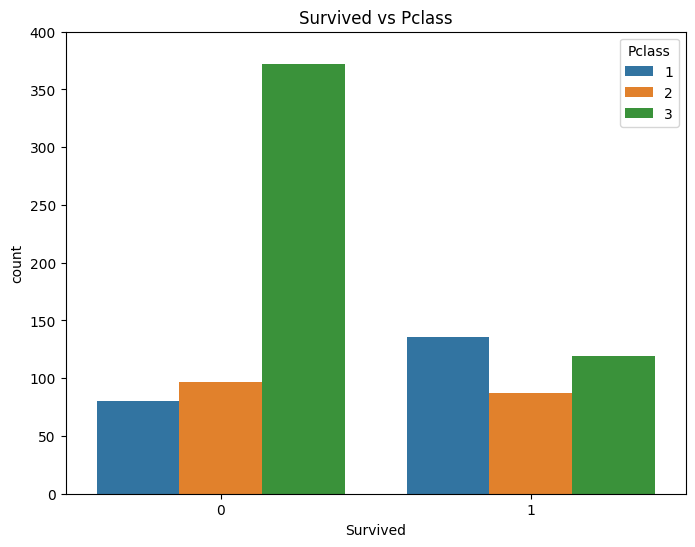

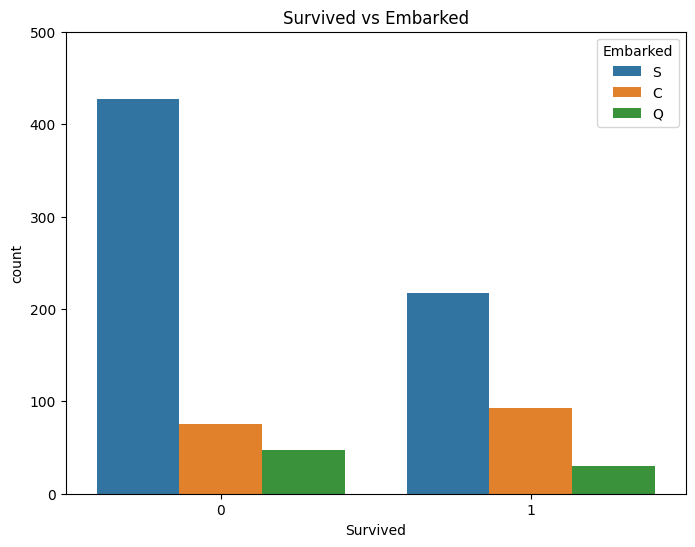

In [46]:
# Plotando gráficos de diversas variaveis
# age
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Age', data=train)
ax.set_ylim(0,100)
plt.title("Survived vs Age")
plt.show()

# Sex
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Sex', data=train)
ax.set_ylim(0,500)
plt.title("Survived vs Sex")
plt.show()

# Pclass
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Pclass', data=train)
ax.set_ylim(0,400)
plt.title("Survived vs Pclass")
plt.show()

# Embarked
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Embarked', data=train)
ax.set_ylim(0,500)
plt.title("Survived vs Embarked")
plt.show()

#### Insights dos gráficos:
- Para variavel idade, poucos pontos estão localizados fora do box plot. No entanto, como ainda está dentro de uma faixa etária razoável (cerca de 62 a 80 anos), manteremos os dados
- As mulheres tinham maior probabilidade de sobreviver do que os homens
- Passageiros da classe alta (Pclass = 1) tiveram maior probabilidade de sobreviver ao acidente
- Os passageiros embarcados de S tiveram menor probabilidade de sobreviver (Possibilidade de correlação entre Pclass e Embarcados)

#### insights adicionais:
- Dado que a classe dos passageiros é significativa na previsão da capacidade de sobrevivência, pode valer a pena tentar imputar a classe social de um passageiro a partir do seu nome.
- Como muitos dos valores são únicos, eliminar as colunas 'PassengerId', 'Ticket' e 'Cabin' pode melhorar a precisão do nosso modelo
- Pode valer a pena combinar as colunas 'SibSp' e 'Parch' para criar uma coluna com o tamanho da familia

In [47]:
# Eliminando as colunas PassengerId, Ticket e Cabin
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train, test]

#### Engenharia de atributos
1. Criar uma coluna FamilySize derivada de SibSp e Parch
2. Criar coluna de titulação do nome a partir do nome do passageiro (ex: Miss, Mister)
3. Codifique todas as colunas categóricas, exceto Embarked (tem valores ausentes)
4. Eliminar colunas desnecessárias

In [48]:
# Criando a coluna titulo a partir do nome do passageiro 
for df in combine:
    # Extraindo a titulação dos passageiros
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [49]:
# Substituindo os títulos por nomes mais comuns e agrupando os títulos raros
common = ['Master', 'Mr', 'Miss', 'Mrs']
for df in combine:
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = [x if x in common else 'Rare' for x in df['Title']]

train['Title'].value_counts()


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [50]:
# Encode columns
for df in combine:
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    #df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
    
    
# Realizando OneHotEncoder

title_ohe1 = pd.get_dummies(train['Title'], prefix = 'Title', drop_first = True)
train = pd.concat([train.drop('Title', axis = 1), title_ohe1], axis = 1)

title_ohe2 = pd.get_dummies(test['Title'], prefix = 'Title', drop_first = True)
test = pd.concat([test.drop('Title', axis = 1), title_ohe2], axis = 1)

In [51]:
# Excluindo as colunas Name, SibSp e Parch 
train = train.drop(['Name', 'SibSp', 'Parch'], axis = 1)
test = test.drop(['Name', 'SibSp', 'Parch'], axis = 1)
combine = [train, test]

#### Imputando a coluna Age
- Para imputar os valores vazio da coluna age, será checada qual a coluna mais correlacionada a idade, e a partir dela imputar valores a coluna Idade


In [59]:
numeric_columns = train.select_dtypes(include='number')
age_corr = numeric_columns.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
age_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
age_corr[age_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
2,Age,Age,1.000000
10,Age,Pclass,0.369226
19,Age,Fare,0.096067
22,Age,Sex,0.093254
23,Age,Survived,0.077221


In [60]:
# Imputando idade a partir da coluna pclass (com maior correlação com a idade)
impute_ages = np.zeros((2,3))
for df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            impute_df = df[(df['Sex'] == i) & \
                                  (df['Pclass'] == j+1)]['Age'].dropna()
            impute_ages[i,j] = int(impute_df.median())
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = impute_ages[i,j]

#### Imputando a coluna Embarked

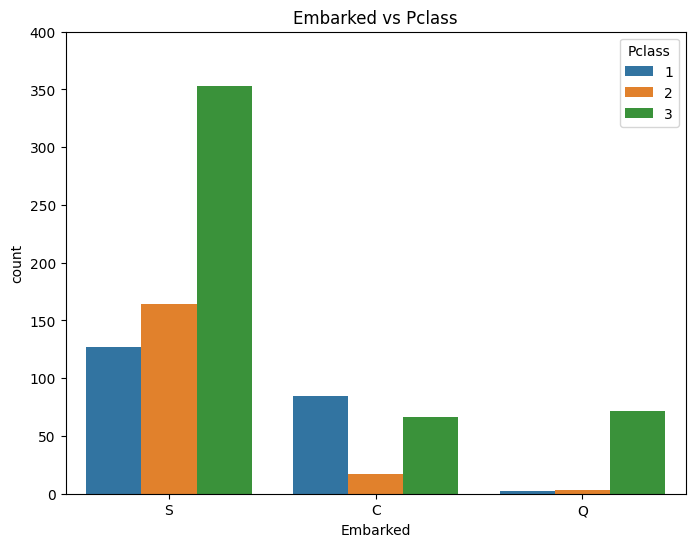

In [62]:
# Checando a correlação entre Embarque e Classe Social
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Embarked',hue='Pclass', data=train)
ax.set_ylim(0,400)
plt.title("Embarked vs Pclass")
plt.show()

- Parece haver alguma correlação entre Embarcado e classe P, uma vez que os passageiros da classe baixa eram mais propensos a embarcar na classe S e a maioria dos passageiros que embarcavam na classe C eram da classe alta.

#### OneHotEncoder na coluna Embarked: Por quê

- OneHotEncoder é uma técnica de pré-processamento usada em aprendizado de máquina para lidar com variáveis categóricas. Ele converte variáveis categóricas em uma representação binária, criando uma nova coluna para cada categoria com valores binários indicando a presença ou ausência dessa categoria.

- Essa técnica é especialmente interessante por que há um pequeno número de categorias (3) na coluna 'Embarked', melhorando a eficiencia de aprendizado de máquina, Permitindo que o modelo compreenda e utilize efetivamente informações de variáveis categóricas em seus cálculos.

    - Ao criar colunas binárias para cada local de embarque, o modelo pode interpretar de maneira mais eficaz as informações categóricas, melhorando a capacidade preditiva do algoritmo. Essa abordagem é especialmente relevante quando lidamos com um conjunto de dados contendo um número restrito de categorias, contribuindo para a interpretação e desempenho aprimorados do modelo.

In [63]:
impute_embarked= ['', '', '']
for df in combine:
    for i in range(0, 3):
        impute_val = df[df['Pclass'] == i+1]['Embarked'].dropna().mode()[0]
        impute_embarked[i] = impute_val
        
    for i in range(0, 3):
        df.loc[ (df.Embarked.isnull()) & (df.Pclass == i+1), 'Embarked'] = impute_embarked[i]

In [64]:
# for df in combine:
#     df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

embarked_ohe1 = pd.get_dummies(train['Embarked'], prefix = 'Embarked', drop_first = True)
train = pd.concat([train.drop('Embarked', axis = 1), embarked_ohe1], axis = 1)

embarked_ohe2 = pd.get_dummies(test['Embarked'], prefix = 'Embarked', drop_first = True)
test = pd.concat([test.drop('Embarked', axis = 1), embarked_ohe2], axis = 1)

combine = [train, test]

In [65]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,False,True,False,False,False,True
1,1,1,0,38.0,71.2833,False,False,True,False,False,False
2,1,3,0,26.0,7.9250,True,False,False,False,False,True
3,1,1,0,35.0,53.1000,False,False,True,False,False,True
4,0,3,1,35.0,8.0500,False,True,False,False,False,True


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,892,3,1,34.5,7.8292,False,True,False,False,True,False
1,893,3,0,47.0,7.0000,False,False,True,False,False,True
2,894,2,1,62.0,9.6875,False,True,False,False,True,False
3,895,3,1,27.0,8.6625,False,True,False,False,False,True
4,896,3,0,22.0,12.2875,False,False,True,False,False,True


#### Imputando a coluna Fare

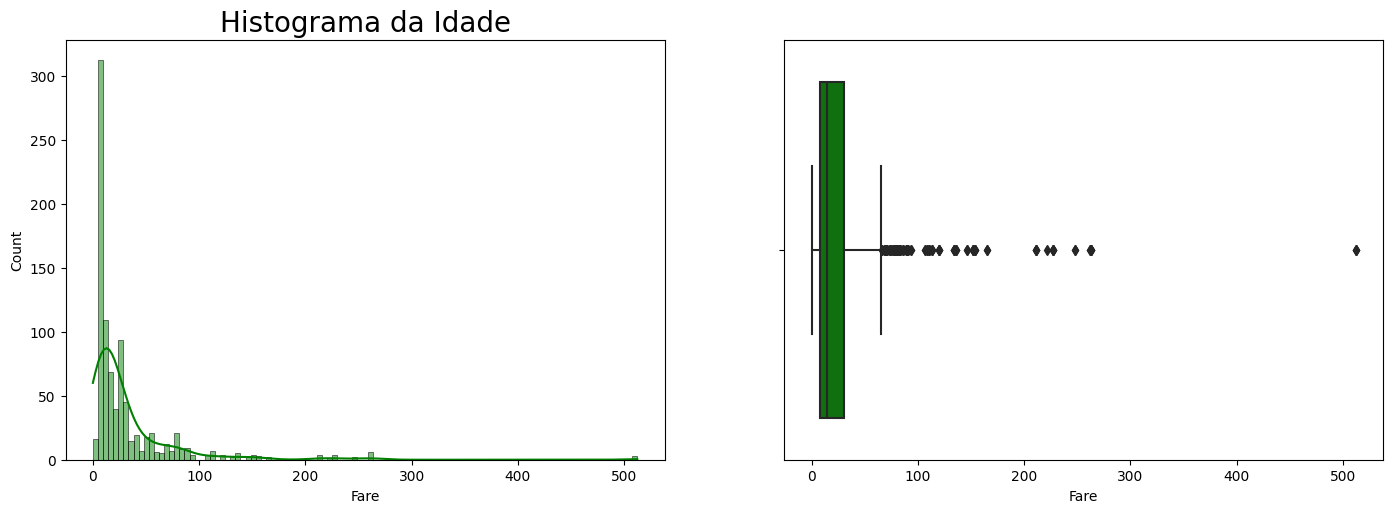

In [69]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente

# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
plt.subplot(221)
sns.histplot(train['Fare'], kde = True, color = "green")
plt.title('Histograma da Idade', fontsize = 20)

plt.subplot(222)
sns.boxplot(x=train['Fare'], color = "green")


plt.show()

In [70]:
# Imputando valores da media para a coluna Fare

imputer = SimpleImputer()
test['Fare'] = list(imputer.fit_transform(test[['Fare']]))
test['Fare'] = [x[0] for x in test['Fare']]

In [72]:
print(train.isnull().sum())
print('-'*80)
print(test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
Embarked_Q    0
Embarked_S    0
dtype: int64
--------------------------------------------------------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Rare     0
Embarked_Q     0
Embarked_S     0
dtype: int64


### Modelagem


In [91]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [116]:
train

,Survived,Pclass,Sex,Age,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,False,True,False,False,False,True
1,1,1,0,38.0,71.2833,False,False,True,False,False,False
2,1,3,0,26.0,7.9250,True,False,False,False,False,True
3,1,1,0,35.0,53.1000,False,False,True,False,False,True
4,0,3,1,35.0,8.0500,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,False,False,False,True,False,True
887,1,1,0,19.0,30.0000,True,False,False,False,False,True
888,0,3,0,21.0,23.4500,True,False,False,False,False,True
889,1,1,1,26.0,30.0000,False,True,False,False,False,False


In [92]:
X = train.drop(columns = 'Survived')
X = pd.get_dummies(X, drop_first = True)

y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:


import warnings
warnings.filterwarnings("ignore")

# Logistic Regression
logreg = LogisticRegression(max_iter = 600, random_state = 42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# XGBoost
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# GBM
gbm = GradientBoostingClassifier(random_state = 42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
gbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# LightGBM
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
lgbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
# Catboost
catb = CatBoostClassifier(verbose = 0, random_state = 42)
catb.fit(X_train, y_train)
y_pred = catb.predict(X_test)
catb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

# Histogram-based Gradient Boosting Classification Tree
hgb = HistGradientBoostingClassifier(random_state = 42)
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)
hgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'LightGBM', 'Catboost', 'HistBoost'],
                    'Score': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc, lgbm_acc, catb_acc, hgb_acc]})


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [97]:
print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

                 Model  Score
0        Random Forest  84.92
1             LightGBM  84.36
2              XGBoost  83.80
3            HistBoost  83.80
4             Catboost  82.12
5                  GBM  81.56
6  Logistic Regression  81.01
7        Decision Tree  77.65


In [114]:
rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1 # Use all cores on your machine
                            )
param_grid = { 
    'n_estimators': [100, 200, 300], # The number of boosting stages to perform
    # 'max_features': ['auto'], # The number of features to consider when looking for the best split
    'max_depth' : [4, 6, 8], # The maximum depth of the individual regression estimators.
    'criterion' :['gini', 'entropy'] #Function to measure the quality of a split
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring = 'accuracy', verbose = 10)
CV_rfc.fit(X, y)
print('')
print('Best hyperparameters:',CV_rfc.best_params_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=4, n_estimators=100..............


[CV 1/5; 1/18] END criterion=gini, max_depth=4, n_estimators=100;, score=0.838 total time=   0.3s
[CV 2/5; 1/18] START criterion=gini, max_depth=4, n_estimators=100..............
[CV 2/5; 1/18] END criterion=gini, max_depth=4, n_estimators=100;, score=0.815 total time=   0.3s
[CV 3/5; 1/18] START criterion=gini, max_depth=4, n_estimators=100..............
[CV 3/5; 1/18] END criterion=gini, max_depth=4, n_estimators=100;, score=0.815 total time=   0.3s
[CV 4/5; 1/18] START criterion=gini, max_depth=4, n_estimators=100..............
[CV 4/5; 1/18] END criterion=gini, max_depth=4, n_estimators=100;, score=0.781 total time=   0.3s
[CV 5/5; 1/18] START criterion=gini, max_depth=4, n_estimators=100..............
[CV 5/5; 1/18] END criterion=gini, max_depth=4, n_estimators=100;, score=0.826 total time=   0.4s
[CV 1/5; 2/18] START criterion=gini, max_depth=4, n_estimators=200..............
[CV 1/5; 2/18] END criterion=gini, max_depth=4, n_estimators=200;, score=0.838 total time=   0.6s
[CV 2/5

In [115]:
X_test = test.drop('PassengerId', axis = 1)
predictions = CV_rfc.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId,
                      'Survived': predictions})

output.to_csv('titanic-submission.csv', index= False)